Missing values per feature before cleaning:
Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64
MAE: 0.287119231720018
MSE: 0.13547920808983488
R^2 Score: 0.441326987592484


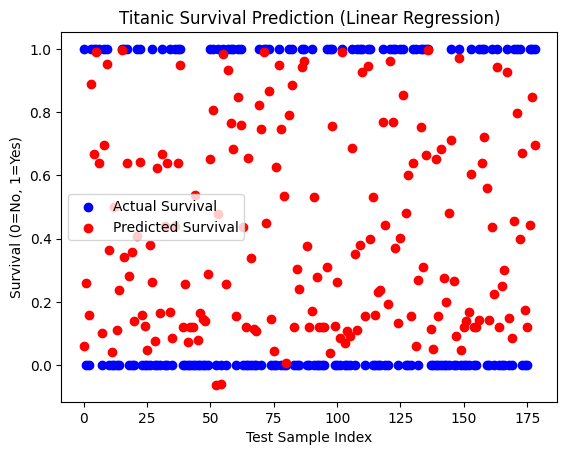

  Feature  Coefficient
0  Pclass    -0.153879
1     Sex     0.518887
2     Age    -0.063088
3   SibSp    -0.041180
4   Parch    -0.023315
5    Fare     0.023967


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from google.colab import files

# Uploaded file name
filename = 'titanic_cleaned_dataset.csv'

# Load dataset
df = pd.read_csv(filename)

# Safer fillna without chained assignment warning
df = df.copy()
df['Age'] = df['Age'].fillna(df['Age'].median())

# Check for missing values in features you want to use
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

print("Missing values per feature before cleaning:")
print(df[features].isnull().sum())

# If other features have NaNs, fill them or drop rows:
df = df.dropna(subset=features)  # Drop rows where any feature is NaN

# Encode 'Sex' if it's still categorical
if df['Sex'].dtype == 'object':
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

X = df[features]
y = df['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict & evaluate
y_pred = model.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R^2 Score: {r2_score(y_test, y_pred)}')

# Plot results
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Survival')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Survival')
plt.xlabel('Test Sample Index')
plt.ylabel('Survival (0=No, 1=Yes)')
plt.title('Titanic Survival Prediction (Linear Regression)')
plt.legend()
plt.show()

# Show coefficients
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print(coefficients)


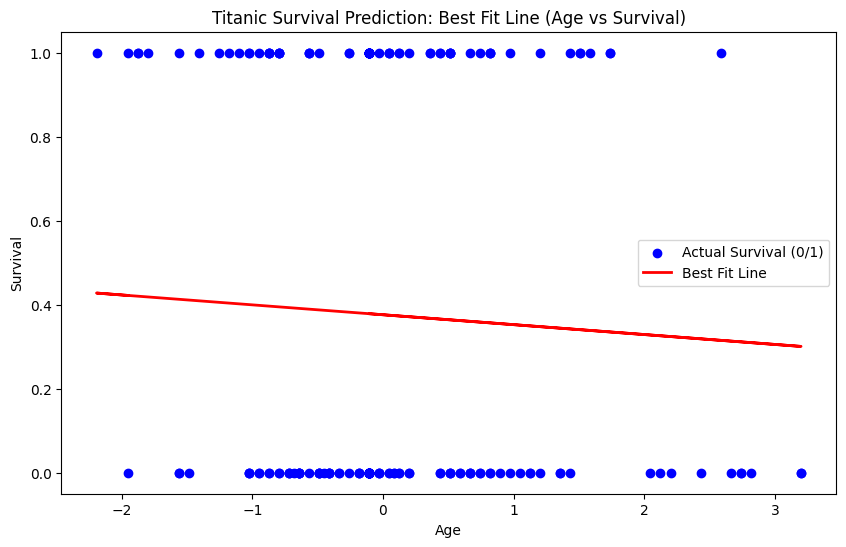

Coefficient (slope): -0.0236
Intercept: 0.3761


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('titanic_cleaned_dataset.csv')

# Clean data
df = df.copy()
df['Age'] = df['Age'].fillna(df['Age'].median())
df = df.dropna(subset=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived'])

# Encode Sex
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# For best fit line, pick one feature — e.g. Age
X = df[['Age']]   # 2D array for sklearn
y = df['Survived']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression on Age only
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Plot
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', label='Actual Survival (0/1)')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('Age')
plt.ylabel('Survival')
plt.title('Titanic Survival Prediction: Best Fit Line (Age vs Survival)')
plt.legend()
plt.show()

# Print model coefficient and intercept
print(f"Coefficient (slope): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
